In [1]:
# Install Packages
!pip install yfinance
!pip install pandas-datareader
!pip install plotly

In [2]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np 
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
# Compile data

start_date = datetime(2020,1,1)
end_date = datetime(2022,4,8)    


tickers = ["QQQ", "VOO", "QYLD", "JEPI", "NTDOY", "ALLY", "DISCA", "HAS", "MDLZ", "DNUT"]
each_df = {}
for ticker in tickers:
    each_df[ticker] = web.DataReader(ticker, 'yahoo', start_date, end_date)
    
stocks = pd.concat(each_df, axis=1, keys = tickers)
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [31]:
stocks.head().round(2)

Ticker Symbol     QQQ                                                   VOO  \
Stock Info       High     Low    Open   Close      Volume Adj Close    High   
Date                                                                          
2020-01-02     216.16  213.98  214.40  216.16  30969400.0    213.64  298.45   
2020-01-03     215.47  213.28  213.30  214.18  27518900.0    211.68  297.36   
2020-01-06     215.59  212.24  212.50  215.56  21655300.0    213.05  297.42   
2020-01-07     216.14  214.85  215.64  215.53  22139300.0    213.02  297.27   
2020-01-08     218.14  215.16  215.50  217.15  26397300.0    214.62  299.31   

Ticker Symbol                          ...   MDLZ                              \
Stock Info        Low    Open   Close  ...   Open  Close     Volume Adj Close   
Date                                   ...                                      
2020-01-02     296.34  297.29  298.42  ...  55.06  54.33  7272900.0     51.70   
2020-01-03     295.04  295.22  296.24  ...  54.00  54.24  6791700.0     51.61   
2020-01-06     294.35  294.42  297.35  ...  54.39  54.15  5906400.0     51.52   
2020-01-07     296.06  296.82  296.53  ...  54.05  53.92  6716300.0     51.31   
2020-01-08     296.47  296.71  298.06  ...  54.03  54.05  5435400.0     51.43   

Ticker Symbol DNUT                                  
Stock Info    High Low Open Close Volume Adj Close  
Date                                                
2020-01-02     NaN NaN  NaN   NaN    NaN       NaN  
2020-01-03     NaN NaN  NaN   NaN    NaN       NaN  
2020-01-06     NaN NaN  NaN   NaN    NaN       NaN  
2020-01-07     NaN NaN  NaN   NaN    NaN       NaN  
2020-01-08     NaN NaN  NaN   NaN    NaN       NaN  

[5 rows x 60 columns]

In [32]:
stocks.shape

(573, 60)

In [33]:
#Basic info
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2020-01-02 to 2022-04-08
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (QQQ, High)         573 non-null    float64
 1   (QQQ, Low)          573 non-null    float64
 2   (QQQ, Open)         573 non-null    float64
 3   (QQQ, Close)        573 non-null    float64
 4   (QQQ, Volume)       573 non-null    float64
 5   (QQQ, Adj Close)    573 non-null    float64
 6   (VOO, High)         573 non-null    float64
 7   (VOO, Low)          573 non-null    float64
 8   (VOO, Open)         573 non-null    float64
 9   (VOO, Close)        573 non-null    float64
 10  (VOO, Volume)       573 non-null    float64
 11  (VOO, Adj Close)    573 non-null    float64
 12  (QYLD, High)        573 non-null    float64
 13  (QYLD, Low)         573 non-null    float64
 14  (QYLD, Open)        573 non-null    float64
 15  (QYLD, Close)       573 non-null    fl

In [34]:
#Organize data
stocks.describe().transpose().style.format("{:.2f}")

<AxesSubplot:xlabel='Ticker Symbol-Stock Info', ylabel='Date'>

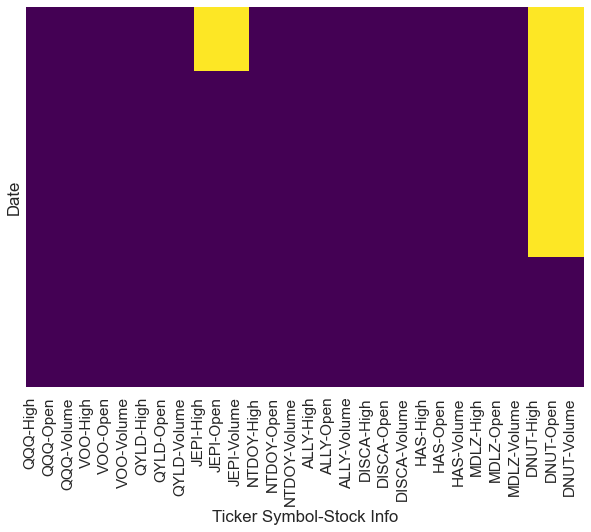

In [35]:
#Create heatmap to see obvious missing data

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.tight_layout()
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
# Combined stock chart

closing_prices_df = stocks.xs(key='Adj Close',axis=1,level=1)

fig = px.line(closing_prices_df, x=closing_prices_df.index, y=closing_prices_df.columns, title="Adj Closing")
fig.update_layout(hovermode='x',yaxis_title="Price")
fig.show()

In [37]:
# Candlestick Chart
# Input ticker of interest
ticker = "QQQ"
fig = go.Figure(data=[go.Candlestick(x=each_df[ticker].index,
                open=each_df[ticker]['Open'],
                high=each_df[ticker]['High'],
                low=each_df[ticker]['Low'],
                close=each_df[ticker]['Close'])])
fig.update_layout(
    title='Candlestick Chart for ' + ticker,
    yaxis_title='Price',
    xaxis_title='Date',
    hovermode='x'
)
fig.show()

In [40]:
# Basic Analysis

# Create a new df that calculates the return after each day.
returns = pd.DataFrame()
 
for ticker in tickers:
    returns[ticker]=closing_prices_df[ticker].pct_change()*100

In [41]:
returns.tail().style.format("{:.4f}")

,QQQ,VOO,QYLD,JEPI,NTDOY,ALLY,DISCA,HAS,MDLZ,DNUT
Date,,,,,,,,,,
2022-04-04 00:00:00,2.0589,0.8479,0.3332,-0.2623,0.7866,-1.2278,3.1175,0.7934,-0.7713,2.1277
2022-04-05 00:00:00,-2.2204,-1.2362,-0.3321,0.1643,-3.0757,-1.1050,-5.3488,-0.0822,-0.0476,-3.5417
2022-04-06 00:00:00,-2.1711,-1.0129,-0.3332,0.7711,0.8368,-0.4190,-2.0475,0.4586,0.3174,0.7199
2022-04-07 00:00:00,0.2378,0.5043,0.0955,0.4559,0.0157,-1.3324,-3.5535,-0.8895,-0.5062,-0.7863
2022-04-08 00:00:00,-1.3979,-0.2424,-0.1431,0.1621,0.5322,1.6110,5.8951,-0.3779,0.8109,-0.5764


In [42]:
returns.mean()

QQQ      0.102243
VOO      0.075312
QYLD     0.034512
JEPI     0.079085
NTDOY    0.072534
ALLY     0.131620
DISCA    0.010528
HAS      0.006843
MDLZ     0.048770
DNUT    -0.138478
dtype: float64

In [43]:
# Date of worst single day returns for each company.
worst = returns.idxmin()
# Date of best single day returns for each company.
best = returns.idxmax()
# Create a dataframe to see best and worst day returns by company
best_and_worst_returns = pd.DataFrame({"Worst":worst, "Best":best})
best_and_worst_returns.columns.names = ['Single Day Returns']
best_and_worst_returns.index.names = ['Ticker']
best_and_worst_returns

Single Day Returns,Worst,Best
Ticker,,
QQQ,2020-03-16,2020-03-13
VOO,2020-03-16,2020-03-24
QYLD,2020-03-16,2020-03-13
JEPI,2020-06-11,2022-02-25
NTDOY,2020-03-12,2020-03-17
ALLY,2020-03-18,2020-03-24
DISCA,2021-03-26,2022-01-07
HAS,2020-03-16,2020-03-24
MDLZ,2020-03-16,2020-03-24


In [44]:
# Standard deviation

returns.std()

Ticker
QQQ      1.803004
VOO      1.602752
QYLD     1.291393
JEPI     0.596923
NTDOY    1.966841
ALLY     3.527161
DISCA    3.391909
HAS      2.591444
MDLZ     1.620393
DNUT     3.874693
dtype: float64

In [46]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
std_2020 = returns.loc['2020-01-01':'2020-12-31'].std()
# as compared to the same time period in 2019
std_2021 = returns.loc['2021-01-01':'2021-12-31'].std()
# Create a dataframe to compare year to year stdev by company
std_comparison_df = pd.DataFrame({"2020":std_2020, "2021":std_2021})
std_comparison_df.columns.names = ['Std Over Years Comparison']
std_comparison_df.index.names = ['Ticker']
std_comparison_df

Std Over Years Comparison,2020,2021
Ticker,,
QQQ,2.247131,1.147632
VOO,2.171158,0.815034
QYLD,1.612418,0.850798
JEPI,0.603315,0.529520
NTDOY,2.184000,1.800158
ALLY,4.759248,1.984090
DISCA,3.234208,3.346052
HAS,3.435388,1.549306
MDLZ,2.147425,0.989151


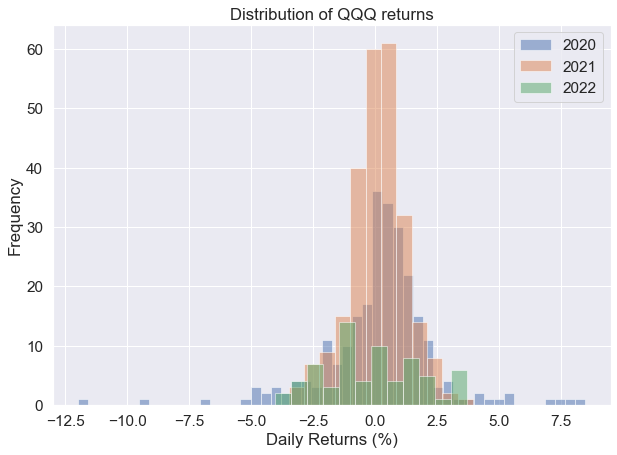

In [49]:
# User input ticker of interest
ticker = "QQQ"
a = returns[ticker].loc[datetime(2020,1,1):datetime(2020,12,31)].dropna()
b = returns[ticker].loc[datetime(2021,1,1):datetime(2021,12,31)].dropna()
c = returns[ticker].loc[datetime(2022,1,1):datetime(2022,12,31)].dropna()
plt.figure(figsize = (10,7))
a.plot(kind='hist', label='2020', bins=50, alpha=0.5)
b.plot(kind='hist', label='2021', bins=12, alpha=0.5)
c.plot(kind='hist', label='2022', bins=12, alpha=0.5)
plt.title('Distribution of ' + ticker + ' returns')
plt.xlabel('Daily Returns (%)')
plt.legend()
plt.show()

In [51]:
# Risk vs Returns

fig = px.scatter(returns, x=returns.mean(), y=returns.std(), text=returns.columns, size_max=60, labels={
                     "x": "Daily Expected Returns (%)",
                     "y": "Risk",
                 },
                title="Stock Risk Vs Returns")
fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.005, 0.01])
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.01, 0.1])
fig.update_traces(textposition='top center')
fig.show()